In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

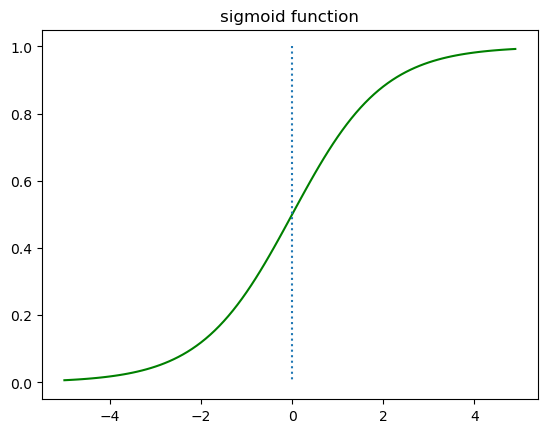

In [3]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':')  # 가운데 점선 추가
# x좌표리스트 , y좌표리스트, , 점선으로 그리기
plt.title('sigmoid function')
plt.show()

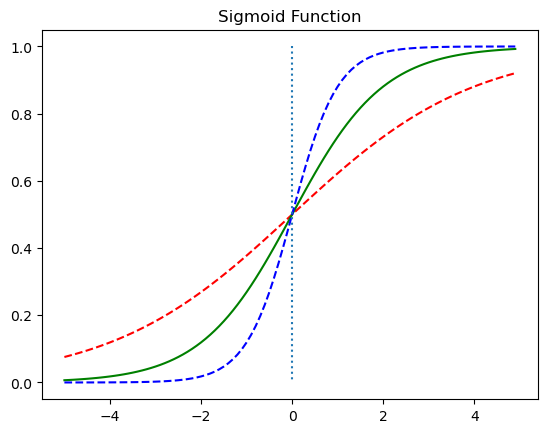

In [4]:
# 가중치 W에 따른 경사 변화
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle='--')  # W의 값이 0.5일때
plt.plot(x, y2, 'g')  # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--')  # W의 값이 2일때
plt.plot([0, 0], [1.0, 0.0], ':')  # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

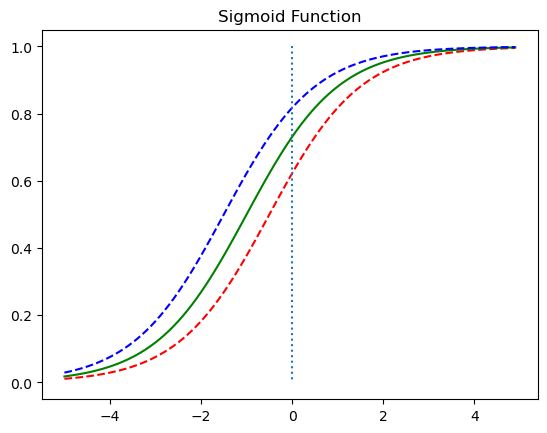

In [5]:
# b 값에 따른 이동
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle='--')  # x + 0.5
plt.plot(x, y2, 'g')  # x + 1
plt.plot(x, y3, 'b', linestyle='--')  # x + 1.5
plt.plot([0, 0], [1.0, 0.0], ':')  # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

시그모이드 함수를 이용한 분류
=> 시그모이드 함수 출력값이 0.5 이상이면 1, 0.5 이하면 0으로 판단

시그모이드 함수의 loss function에 MSE를 적용하면 non convex 형태의 그래프임
convex 형태 : 임의의 두점을 잡았을때 모든 점들이 위 또는 아래에 위치
non convex => convex 하지 않은 것
이렇게되면 local minimul의 가능성이 있음

그래서 시그모이드 함수에서 실제값과 예측값이 다를때 오차가 커지는건 log 함수임
실제 라벨 y가 1일 때: -log(H(x))
실제 라벨 y가 0일 때: -log(1 - H(x))
를 사용하고 이 오차에 대해 MSE를 사용함


In [6]:
# 파이토치로 로지스틱 회귀 구현하기
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [7]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [8]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [9]:
# 파라미터
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [10]:
# 가설식
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
print(hypothesis) # 예측값인 H(x) 출력
# torch.zero에 의해 모두 0에 의해 초기화 됨

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [11]:
# 파이토치에서 제공하는 시그모이드 식 
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [12]:
# 하나의 원소에대해 오차를 구하는 식
-(y_train[0] * torch.log(hypothesis[0]) +
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [13]:
# 전체 원소에 대해 오차구하기
losses = -(y_train * torch.log(hypothesis) +
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [14]:
# 오차의 평균 구하기
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [15]:
# 손실함수(비용함수)를 직접 구현했지만 파이토치에서는 로지스틱 회귀 비용함수를 이미 구현해서 제공해줌
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [16]:
# 모델 훈련까지의 코드
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) +
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [17]:
# 학습된 파라미터에 대해 예측값 출력
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [18]:
# 0.5를 기준으로 분류
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [19]:
# 파라미터 출력
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


## 4-2 nn.module로 구현하는 로지스틱 회귀

In [20]:
# 데이터 가져오기
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

nn.Sequential은 nn.Module을 차례대로 쌓을 수 있음

In [21]:
model = nn.Sequential(
    nn.Linear(2, 1), # input_dim = 2, output_dim = 1
    nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [22]:
model(x_train) # 훈련이 안된 상태

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [23]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614852 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [24]:
list(model.parameters())
# 위에서 구한 값과 거의 일치함

[Parameter containing:
 tensor([[3.2534, 1.5181]], requires_grad=True),
 Parameter containing:
 tensor([-14.4839], requires_grad=True)]

In [25]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

## 4-3 클래스로 이진분류 구현하기


In [26]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [27]:
model = BinaryClassifier()


In [28]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [29]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])  # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train  # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction)  # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(  # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))




Epoch    0/1000 Cost: 0.614994 Accuracy 66.67%
Epoch   10/1000 Cost: 0.747550 Accuracy 83.33%
Epoch   20/1000 Cost: 0.633216 Accuracy 83.33%
Epoch   30/1000 Cost: 0.538122 Accuracy 83.33%
Epoch   40/1000 Cost: 0.450406 Accuracy 83.33%
Epoch   50/1000 Cost: 0.366382 Accuracy 83.33%
Epoch   60/1000 Cost: 0.287368 Accuracy 83.33%
Epoch   70/1000 Cost: 0.219288 Accuracy 83.33%
Epoch   80/1000 Cost: 0.173225 Accuracy 100.00%
Epoch   90/1000 Cost: 0.151674 Accuracy 100.00%
Epoch  100/1000 Cost: 0.140280 Accuracy 100.00%
Epoch  110/1000 Cost: 0.131002 Accuracy 100.00%
Epoch  120/1000 Cost: 0.122903 Accuracy 100.00%
Epoch  130/1000 Cost: 0.115765 Accuracy 100.00%
Epoch  140/1000 Cost: 0.109426 Accuracy 100.00%
Epoch  150/1000 Cost: 0.103760 Accuracy 100.00%
Epoch  160/1000 Cost: 0.098664 Accuracy 100.00%
Epoch  170/1000 Cost: 0.094056 Accuracy 100.00%
Epoch  180/1000 Cost: 0.089870 Accuracy 100.00%
Epoch  190/1000 Cost: 0.086050 Accuracy 100.00%
Epoch  200/1000 Cost: 0.082549 Accuracy 100.00%


In [30]:
model(x_train) > 0.5

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])